**Auswertung:**


**Schlussfolgerung:**



In [1]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [2]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [3]:
import StateUtilities as SU

In [4]:
import visualization_helper_v2 as vh

In [5]:
fig_width = 16

In [6]:
dirnames = ["../checkpoints/s131/20210510-2258/",
            "../checkpoints/s132/20210510-2259/",
            "../checkpoints/s133/20210510-2303/",
            "../checkpoints/s134/20210510-2303/"]

In [7]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [8]:
q_values = vh.load_and_convert_q_values(dirnames)

In [9]:
vh.get_arguments_overview(dirnames)

,s131,s132,s133,s134
lr,0.05,0.005,0.06,0.005
discount_factor,0.7,0.8,0.7,0.25
batch_size,512,256,256,256
reward_scale,0.25,0.125,1.0,0.1
reward_offset,0.5,0.1,0.0,0.05
stp_reward_step_offset,1.0,2.0,1.5,1.0
target_network_update_freq,7,4,6,6
epsilon_final_step,22000,22000,30000,30000
agent_network,"1HiddenBigLayer,SiLU","1HiddenBigLayer,SiLU","2HiddenLayer,Trapezium","2HiddenLayer,Trapezium,SiLU"
agent_init_gain,0.3,0.25,0.8,0.2


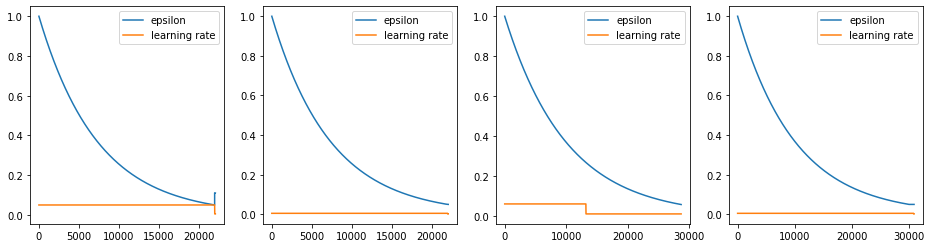

In [10]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

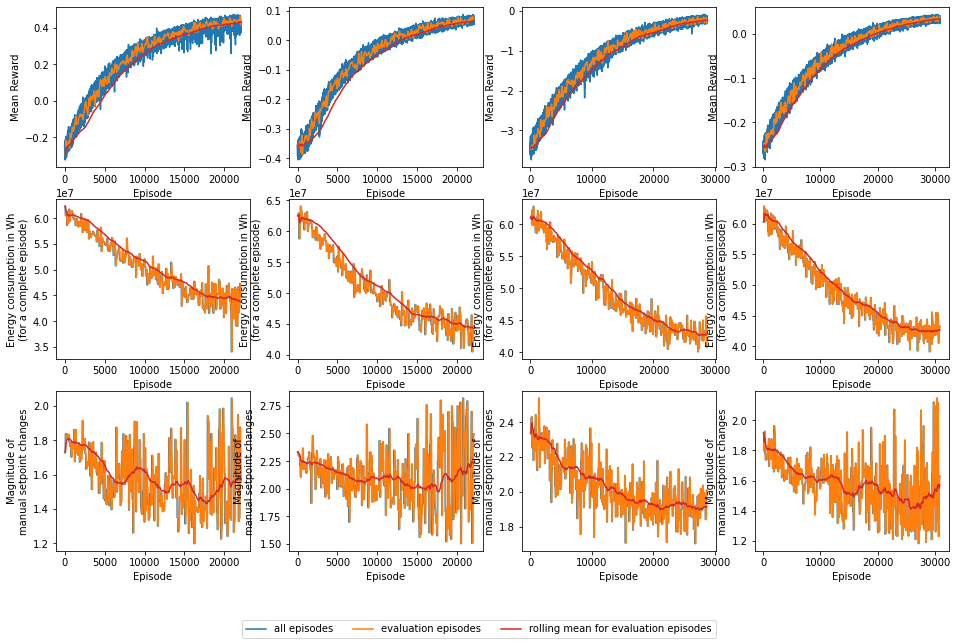

In [11]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

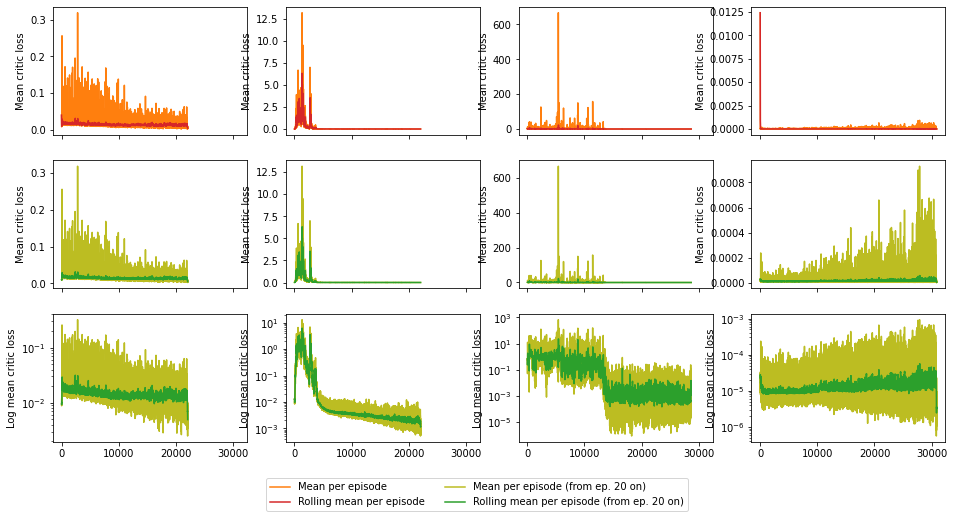

In [12]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

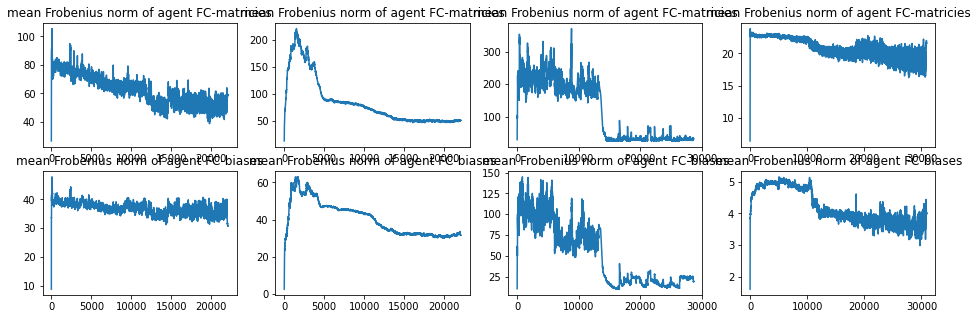

In [13]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [14]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:  22087
Last available evaluation episode for dfs1:  22087
Last available evaluation episode for dfs2:  28687
Last available evaluation episode for dfs3:  30887


<h3>Details for one week</h3>

In [15]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [16]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [17]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode 22087: Energy consumption:   44917.95 kWh; Numer of setpoint changes: 1118.4120291936347
For episode 22087: Energy consumption:   44733.84 kWh; Numer of setpoint changes: 1792.6109755537873
For episode 28687: Energy consumption:   40838.28 kWh; Numer of setpoint changes: 1444.6924412018907
For episode 30887: Energy consumption:   43253.52 kWh; Numer of setpoint changes: 1173.314819549103

Mean values for episode ...
... 22087: Reward:  0.41481 kWh; Setpoint change magnit.:  1.55551; Energy cons.: 62472.80301
... 22087: Reward:  0.07323 kWh; Setpoint change magnit.:  2.49320; Energy cons.: 62216.75022
... 28687: Reward: -0.31919 kWh; Setpoint change magnit.:  2.00931; Energy cons.: 56798.71585
... 30887: Reward:  0.03929 kWh; Setpoint change magnit.:  1.63187; Energy cons.: 60157.88697


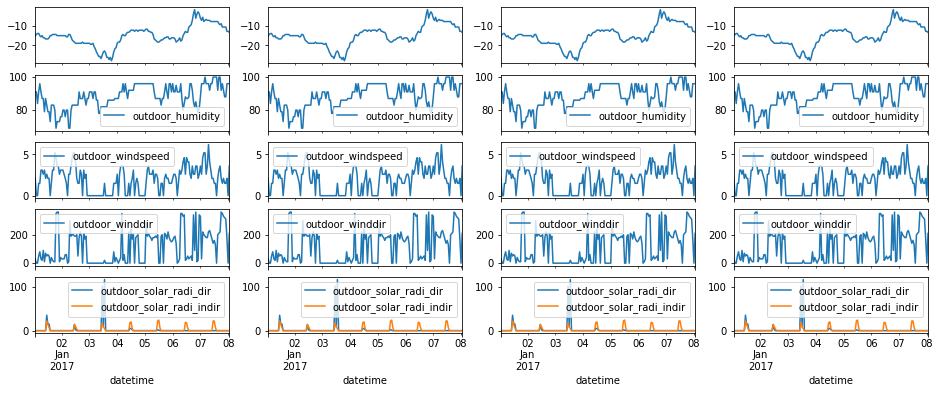

In [18]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

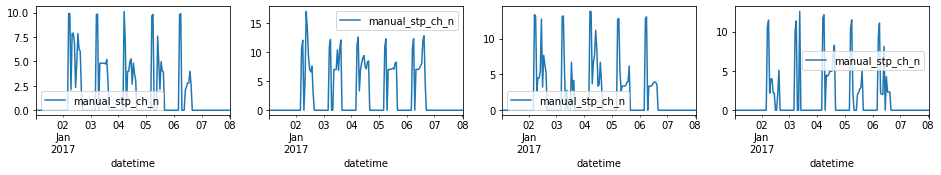

In [19]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

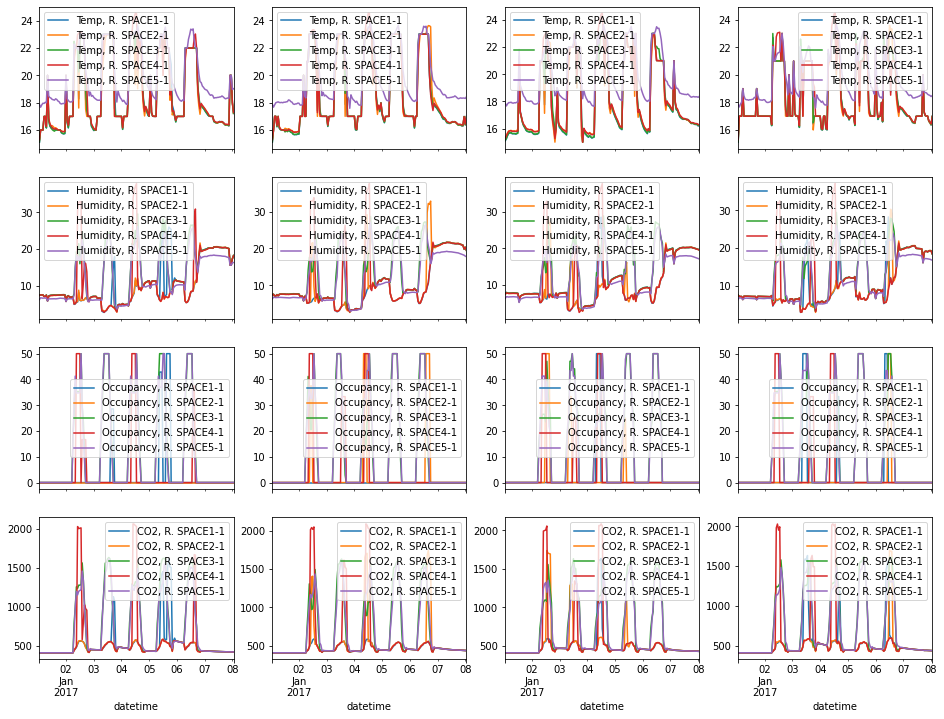

In [20]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [21]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: [0] 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: [0] 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: [0] 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: [0] 



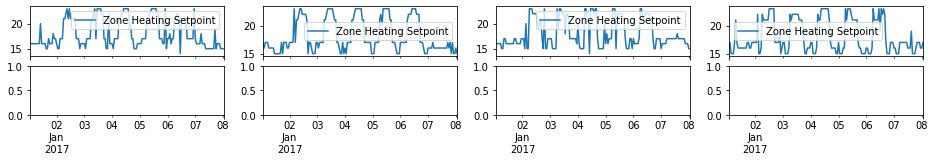

In [22]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

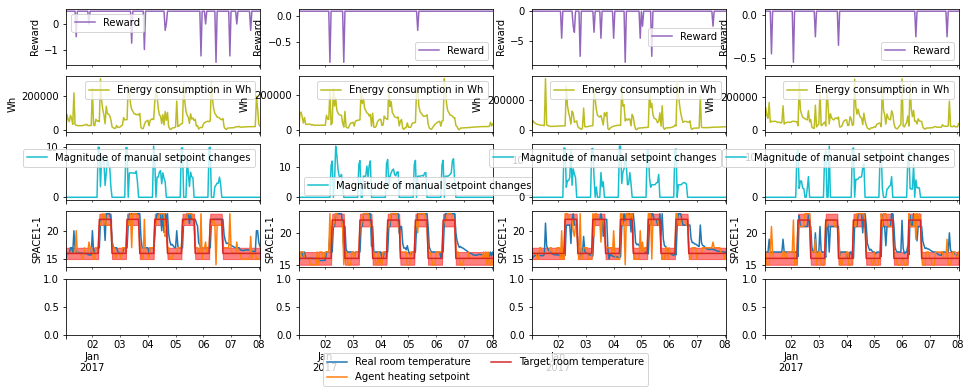

In [23]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [24]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [25]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

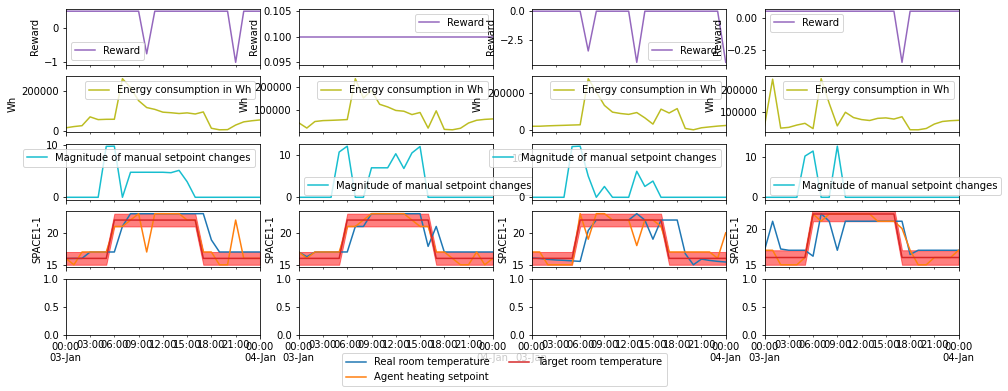

In [26]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [27]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [28]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  61888.2 Wh, mean reward =  0.4127
For plot number 2, mean energy consumption =  61466.1 Wh, mean reward =  0.0741
For plot number 3, mean energy consumption =  56309.6 Wh, mean reward = -0.3154
For plot number 4, mean energy consumption =  59211.6 Wh, mean reward =  0.0389


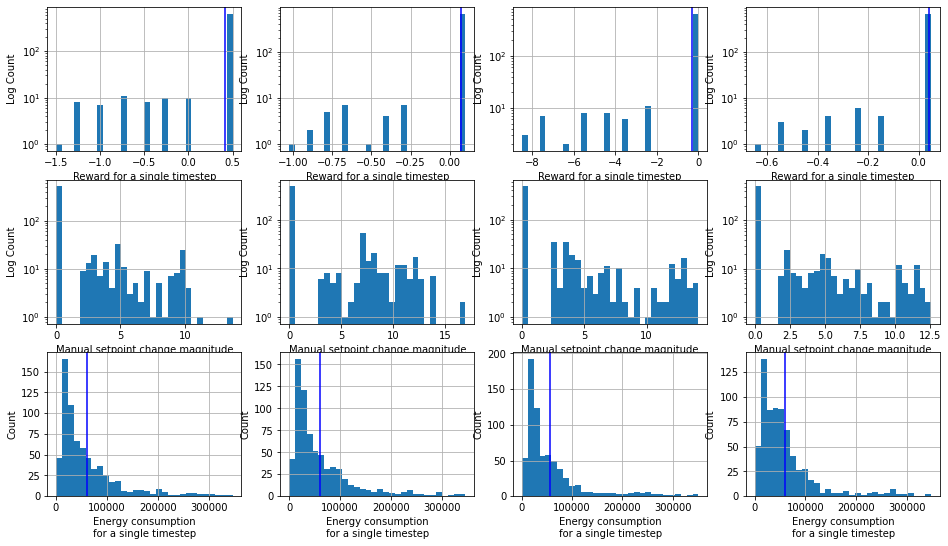

In [29]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

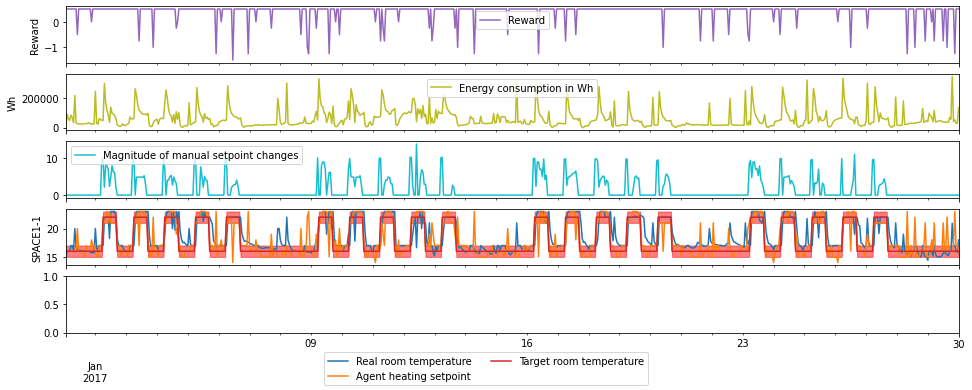

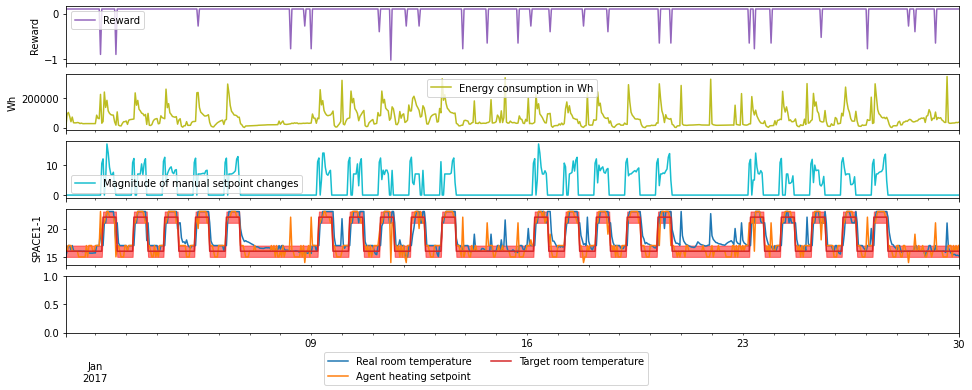

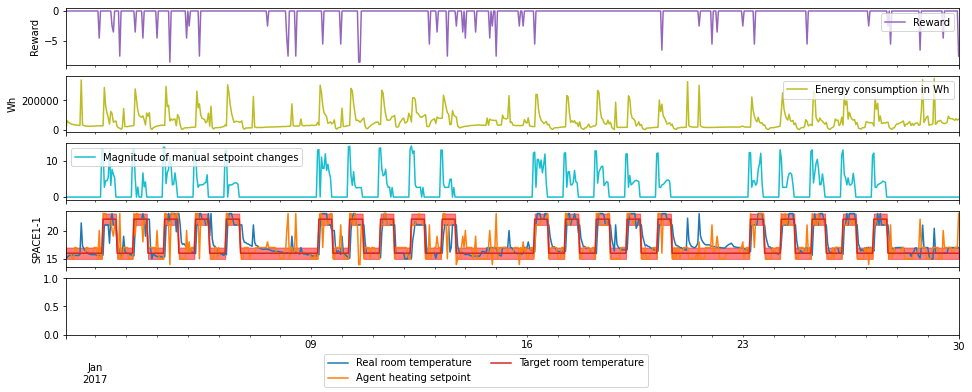

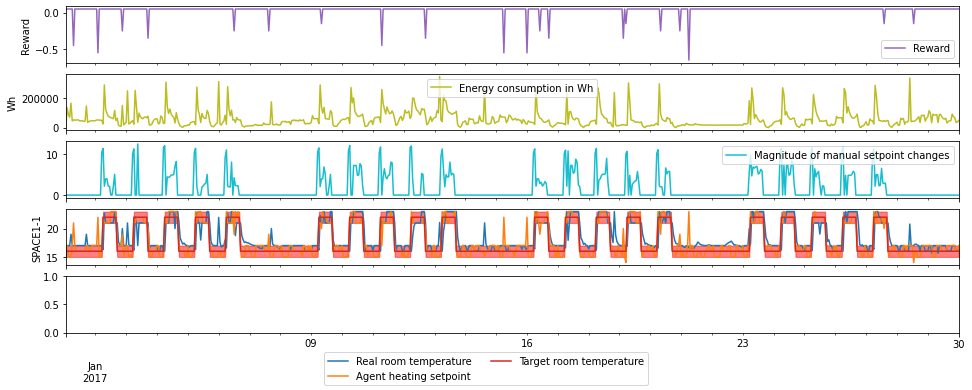

In [30]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

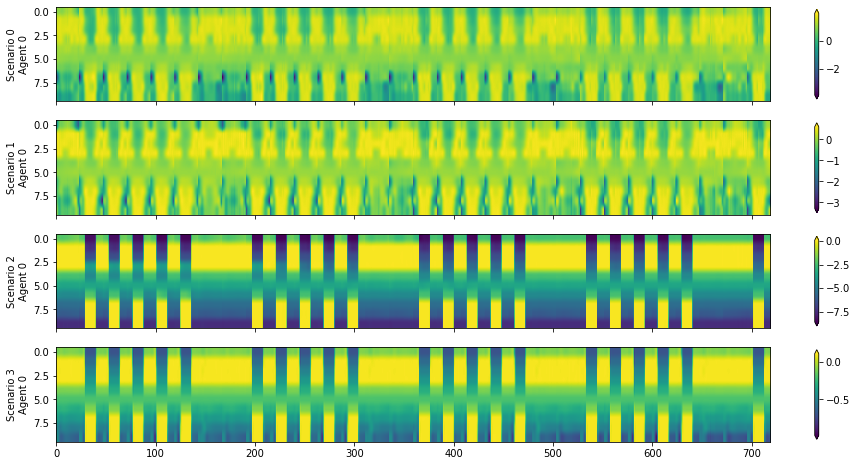

In [31]:
vh.plot_q_values(q_values, fig_width)